In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [6]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [7]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [20]:
columns =["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df['STATE'].unique()

for state in states:
        education_df.loc[education_df['STATE'] == state, columns] = education_df.loc[education_df['STATE'] == state, columns].interpolate()
        
education_df.dropna(inplace=True)

Text(0.5,1,'TOTAL EXPENDITURE DISTRIBUTION')

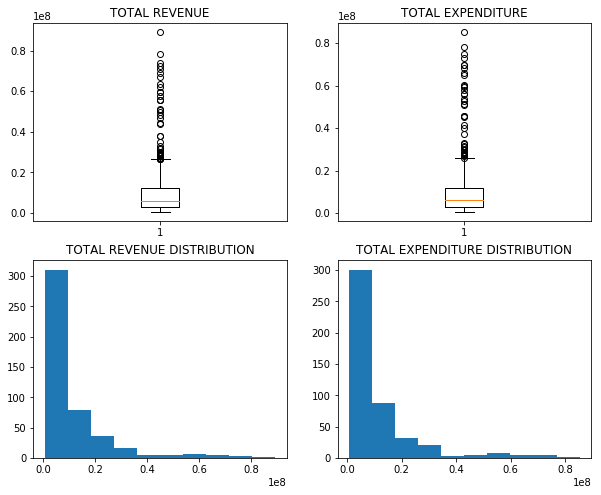

In [30]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.title('TOTAL REVENUE')
plt.boxplot(education_df['TOTAL_REVENUE'])

plt.subplot(2,2,2)
plt.boxplot(education_df['TOTAL_EXPENDITURE'])
plt.title('TOTAL EXPENDITURE')

plt.subplot(2,2,3)
plt.title('TOTAL REVENUE DISTRIBUTION')
plt.hist(education_df['TOTAL_REVENUE'])

plt.subplot(2,2,4)
plt.hist(education_df['TOTAL_EXPENDITURE'])
plt.title('TOTAL EXPENDITURE DISTRIBUTION')

Text(0.5,1,'Winsor TOTAL EXPENDITURE DISTRIBUTION')

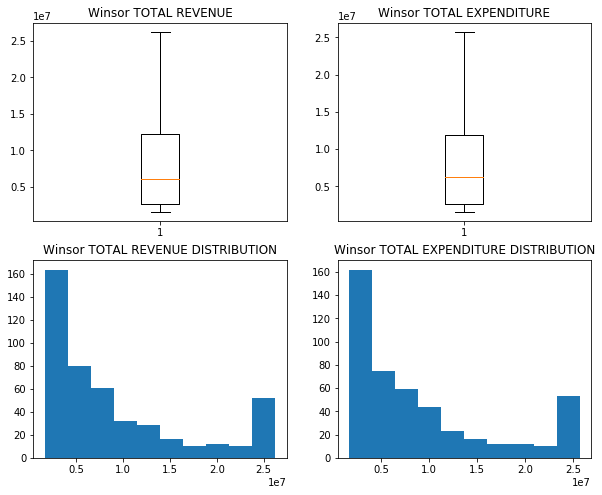

In [36]:
from scipy.stats.mstats import winsorize

winsorized_revenue = winsorize(education_df['TOTAL_REVENUE'],0.10)
winsorized_expenditure = winsorize(education_df['TOTAL_EXPENDITURE'],0.10)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.title('Winsor TOTAL REVENUE')
plt.boxplot(winsorized_revenue)

plt.subplot(2,2,2)
plt.boxplot(winsorized_expenditure)
plt.title('Winsor TOTAL EXPENDITURE')

plt.subplot(2,2,3)
plt.title('Winsor TOTAL REVENUE DISTRIBUTION')
plt.hist(winsorized_revenue)

plt.subplot(2,2,4)
plt.hist(winsorized_expenditure)
plt.title('Winsor TOTAL EXPENDITURE DISTRIBUTION')

Winsorization reveals no outliers.

In [38]:
education_df['BUDGET_DEFICIT'] = education_df['TOTAL_REVENUE'] - education_df['TOTAL_EXPENDITURE']

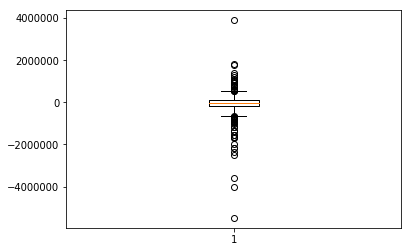

In [40]:
plt.boxplot(education_df['BUDGET_DEFICIT'])
plt.show()

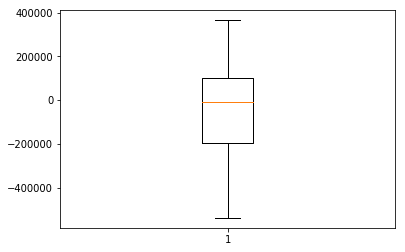

In [41]:
winsorized_budget = winsorize(education_df['BUDGET_DEFICIT'],0.10)

plt.boxplot(winsorized_budget)
plt.show()

That worked! No more outliers.

In [42]:
new_budget = winsorized_revenue - winsorized_expenditure

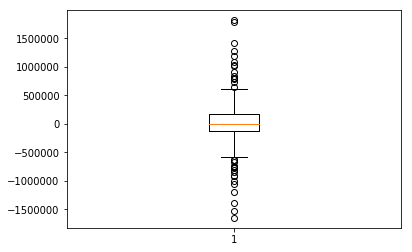

In [43]:
plt.boxplot(new_budget)
plt.show()

In [57]:
winsorized_newbudget = winsorize(new_budget,(.05,.05))

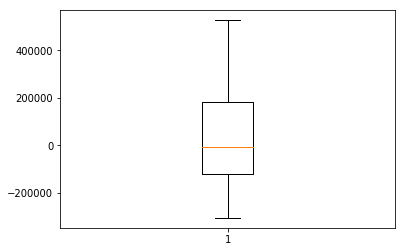

In [46]:
plt.boxplot(winsorized_newbudget)
plt.show()

In [59]:
pd.DataFrame({'original':education_df['BUDGET_DEFICIT'],'new budget':winsorized_budget,'second try':winsorized_newbudget}).describe()

,original,new budget,second try
count,4.660000e+02,466.000000,466.000000
mean,-8.094882e+04,-46221.075107,42205.066524
std,6.144222e+05,256023.510074,286953.898365
min,-5.487742e+06,-538253.000000,-526142.000000
25%,-1.965748e+05,-196574.750000,-122481.750000
50%,-8.872500e+03,-8872.500000,-5853.000000
75%,1.013948e+05,101394.750000,180287.250000
max,3.897129e+06,365079.000000,526078.000000
